<a href="https://colab.research.google.com/github/quaziharis/machine_Learning/blob/master/Fashion_Minstdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
fashion_mnist=keras.datasets.fashion_mnist###load the data

In [0]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()##divide the dataset into train and test

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape####60000 images in training data and 28,28 is the pixel value of images##xtrain

(60000, 28, 28)

In [0]:
train_labels.shape###ytrain

(60000,)

In [0]:
test_images.shape##xtest

(10000, 28, 28)

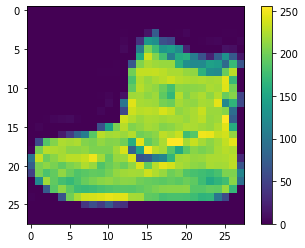

In [0]:
plt.figure()
plt.imshow(train_images[0])####to plot the 1st image
plt.colorbar()##to plot the color baar i.e on the right side in the range of 0 to 255
plt.grid(False)####off grid
plt.show()

In [0]:
train_images=train_images / 255.0    ## to reduce the image pixel value from 0 to 255 to 0 to 1
test_images=test_images / 255.0

In [0]:
train_images.shape

(60000, 28, 28)

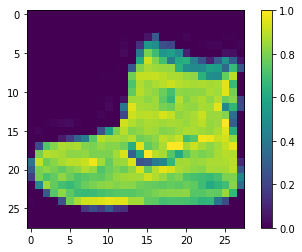

In [0]:
plt.figure()
plt.imshow(train_images[0])####to plot the 1st image
plt.colorbar()##to plot the color baar i.e on the right side in the range of 0 to 1
plt.grid(False)####off grid
plt.show()

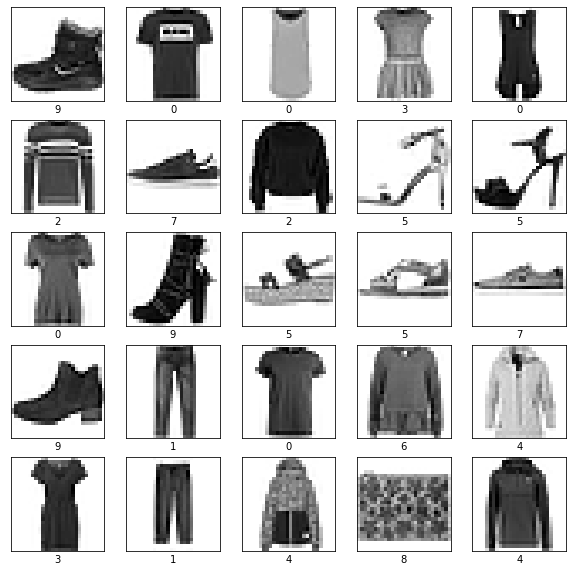

In [0]:
##to plot first 25 images
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)####to plot 5 image in one row and 5 image in colmn and axis is i+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)###plt.image is used to plpt the image,cm.binary is used to get black and white image 
  plt.xlabel(train_labels[i])###to plot the label names
plt.show()


In [0]:
##give class names
class_name=['tshirt/top','trousers','Pullover','Dress','Coat','sandle','Shirt','Sneaker','Bag','Ankel_boot']

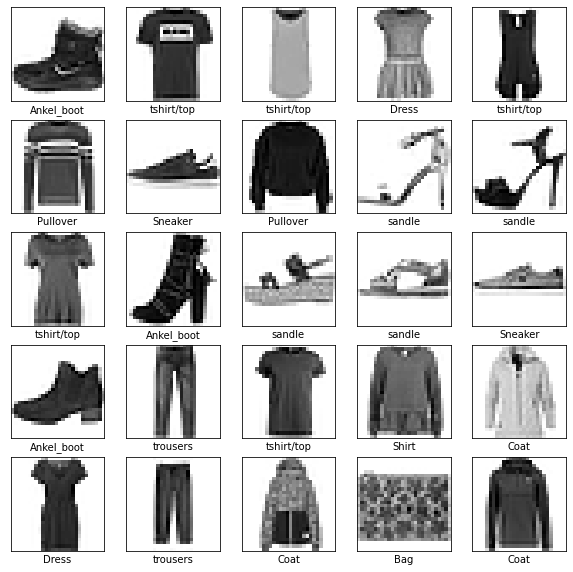

In [0]:
##to plot first 25 images using class names
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)####to plot 5 image in one row and 5 image in colmn and axis is i+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks

Using TensorFlow backend.


In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

In [0]:
model =tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))###it transforms the 2d araay of 28 by 28 into 1 d array
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),batch_size=10,epochs=50,verbose=2)##to fit the data on training set

Epoch 1/50
6000/6000 - 10s - loss: 0.4819 - accuracy: 0.8248 - val_loss: 0.4342 - val_accuracy: 0.8488
Epoch 2/50
6000/6000 - 11s - loss: 0.3681 - accuracy: 0.8646 - val_loss: 0.3997 - val_accuracy: 0.8567
Epoch 3/50
6000/6000 - 10s - loss: 0.3320 - accuracy: 0.8786 - val_loss: 0.3771 - val_accuracy: 0.8678
Epoch 4/50
6000/6000 - 10s - loss: 0.3115 - accuracy: 0.8834 - val_loss: 0.3497 - val_accuracy: 0.8768
Epoch 5/50
6000/6000 - 10s - loss: 0.2971 - accuracy: 0.8892 - val_loss: 0.3553 - val_accuracy: 0.8766
Epoch 6/50
6000/6000 - 10s - loss: 0.2852 - accuracy: 0.8941 - val_loss: 0.3445 - val_accuracy: 0.8800
Epoch 7/50
6000/6000 - 10s - loss: 0.2719 - accuracy: 0.8987 - val_loss: 0.3548 - val_accuracy: 0.8769
Epoch 8/50
6000/6000 - 10s - loss: 0.2628 - accuracy: 0.9009 - val_loss: 0.3625 - val_accuracy: 0.8719
Epoch 9/50
6000/6000 - 10s - loss: 0.2555 - accuracy: 0.9040 - val_loss: 0.3788 - val_accuracy: 0.8706
Epoch 10/50
6000/6000 - 10s - loss: 0.2474 - accuracy: 0.9057 - val_loss:

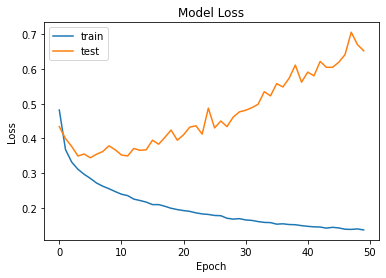

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

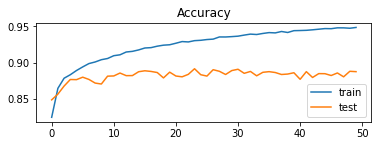

In [0]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [0]:
prediction=model.predict(test_images)####to predict the test images

In [0]:
prediction[0]##predition his 10 nos discribe the confidence of the model 

array([5.5508054e-16, 6.7879611e-36, 2.3757987e-15, 0.0000000e+00,
       2.3176623e-34, 7.2041811e-10, 4.0168905e-20, 6.4295366e-12,
       6.6292812e-27, 1.0000000e+00], dtype=float32)

In [0]:
np.argmax(prediction[0])###this shows that the image is of class 9 i.e of  ankel boot

9

In [0]:
##verify with the actual image
test_labels[0]

9

In [0]:
for i in range (0,25):
  print(np.argmax(prediction[i]))

9
2
1
1
0
1
4
6
5
7
4
5
5
3
4
1
2
2
8
0
2
5
7
5
1


In [0]:
for i in range (0,25):
  print(test_labels[i])

9
2
1
1
6
1
4
6
5
7
4
5
7
3
4
1
2
4
8
0
2
5
7
9
1


In [0]:
predictions=prediction

In [0]:
predictions=np.squeeze(predictions)

In [0]:
prediction

array([[5.5508054e-16, 6.7879611e-36, 2.3757987e-15, ..., 6.4295366e-12,
        6.6292812e-27, 1.0000000e+00],
       [1.0408805e-11, 4.2074980e-18, 9.9843627e-01, ..., 2.9863772e-32,
        6.9943032e-19, 2.2952725e-38],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.3553150e-33, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.8898861e-38, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.3943342e-28, 0.0000000e+00, 2.3466436e-29, ..., 6.8056422e-10,
        2.2607988e-18, 1.0066250e-23]], dtype=float32)

In [0]:
predictions

array([[5.5508054e-16, 6.7879611e-36, 2.3757987e-15, ..., 6.4295366e-12,
        6.6292812e-27, 1.0000000e+00],
       [1.0408805e-11, 4.2074980e-18, 9.9843627e-01, ..., 2.9863772e-32,
        6.9943032e-19, 2.2952725e-38],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.3553150e-33, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.8898861e-38, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.3943342e-28, 0.0000000e+00, 2.3466436e-29, ..., 6.8056422e-10,
        2.2607988e-18, 1.0066250e-23]], dtype=float32)

In [0]:
def plot_image(i,predictions_array,true_label,img):
  predictions=predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label=np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{}{:2.0f}%({})'.format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
             color=color)  

def plot_value_array(i,predictions_array,true_label):
  predictions_array,true_label=predictions_array[i],true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot= plt.bar(range(10),predictions_array,predictions_array,color="#777777")
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')     

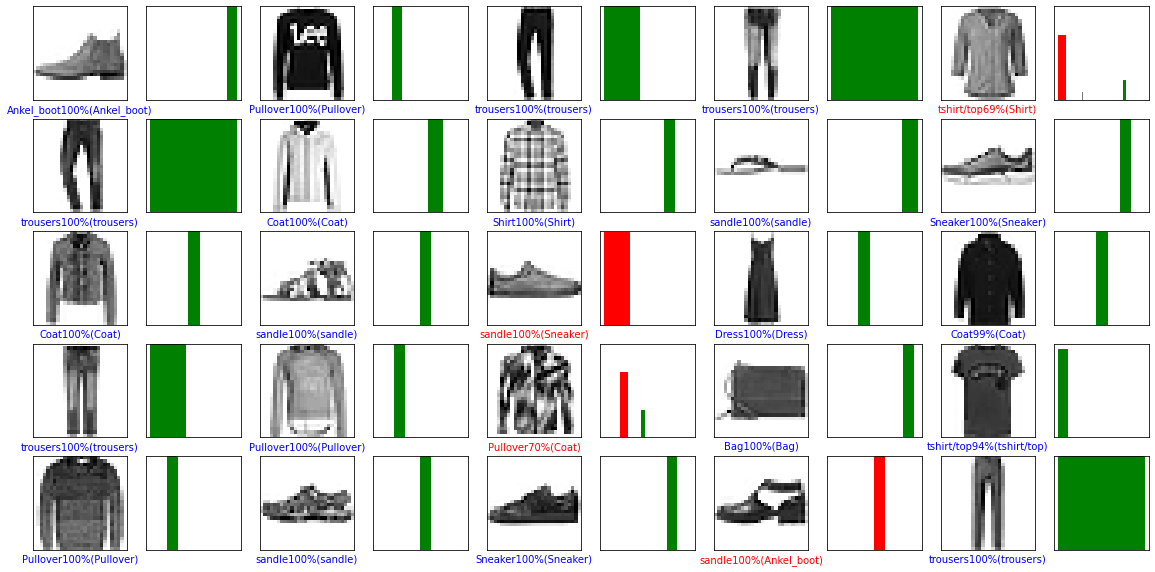

In [0]:
num_rows= 5
num_cols= 5
num_images= num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions,test_labels)
plt.show()   

In [0]:
# reshape dataset to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [0]:
train_images.shape

(60000, 28, 28, 1)

In [0]:
test_images.shape

(10000, 28, 28, 1)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#	compile model
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,verbose=2)

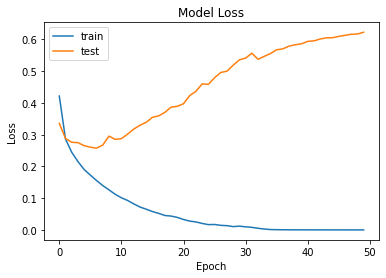

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

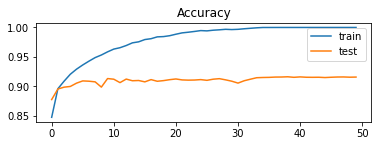

In [0]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform', input_shape=(28, 28, 1)))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#	compile model
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),batch_size=32,epochs=50,verbose=2)

Epoch 1/50
1875/1875 - 32s - loss: 0.4082 - accuracy: 0.8531 - val_loss: 0.3454 - val_accuracy: 0.8764
Epoch 2/50
1875/1875 - 32s - loss: 0.2785 - accuracy: 0.8989 - val_loss: 0.3002 - val_accuracy: 0.8914
Epoch 3/50
1875/1875 - 32s - loss: 0.2371 - accuracy: 0.9140 - val_loss: 0.2855 - val_accuracy: 0.8926
Epoch 4/50
1875/1875 - 32s - loss: 0.2090 - accuracy: 0.9235 - val_loss: 0.2962 - val_accuracy: 0.8950
Epoch 5/50
1875/1875 - 32s - loss: 0.1866 - accuracy: 0.9310 - val_loss: 0.2694 - val_accuracy: 0.9045
Epoch 6/50
1875/1875 - 32s - loss: 0.1695 - accuracy: 0.9381 - val_loss: 0.2637 - val_accuracy: 0.9076
Epoch 7/50
1875/1875 - 32s - loss: 0.1516 - accuracy: 0.9440 - val_loss: 0.2663 - val_accuracy: 0.9091
Epoch 8/50
1875/1875 - 32s - loss: 0.1368 - accuracy: 0.9499 - val_loss: 0.2660 - val_accuracy: 0.9088
Epoch 9/50
1875/1875 - 32s - loss: 0.1222 - accuracy: 0.9552 - val_loss: 0.2866 - val_accuracy: 0.9062
Epoch 10/50
1875/1875 - 32s - loss: 0.1100 - accuracy: 0.9608 - val_loss:

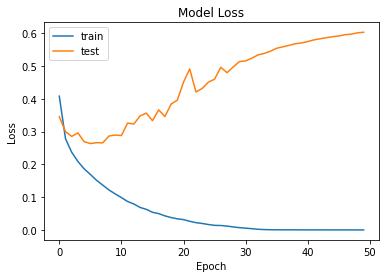

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

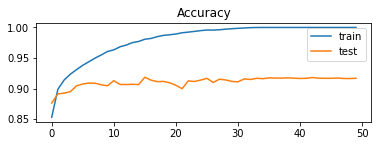

In [0]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform', input_shape=(28, 28, 1)))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, kernel_initializer='he_uniform'))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#	compile model
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),batch_size=32,epochs=50,verbose=2)

Epoch 1/50
1875/1875 - 54s - loss: 0.4185 - accuracy: 0.8474 - val_loss: 0.3280 - val_accuracy: 0.8815
Epoch 2/50
1875/1875 - 54s - loss: 0.2769 - accuracy: 0.8992 - val_loss: 0.2804 - val_accuracy: 0.8960
Epoch 3/50
1875/1875 - 54s - loss: 0.2355 - accuracy: 0.9137 - val_loss: 0.2636 - val_accuracy: 0.9066
Epoch 4/50
1875/1875 - 54s - loss: 0.2083 - accuracy: 0.9232 - val_loss: 0.2570 - val_accuracy: 0.9097
Epoch 5/50
1875/1875 - 54s - loss: 0.1866 - accuracy: 0.9312 - val_loss: 0.2579 - val_accuracy: 0.9088
Epoch 6/50
1875/1875 - 54s - loss: 0.1698 - accuracy: 0.9362 - val_loss: 0.2528 - val_accuracy: 0.9069
Epoch 7/50
1875/1875 - 53s - loss: 0.1519 - accuracy: 0.9439 - val_loss: 0.2400 - val_accuracy: 0.9145
Epoch 8/50
1875/1875 - 53s - loss: 0.1369 - accuracy: 0.9487 - val_loss: 0.2532 - val_accuracy: 0.9163
Epoch 9/50
1875/1875 - 53s - loss: 0.1237 - accuracy: 0.9546 - val_loss: 0.2593 - val_accuracy: 0.9189
Epoch 10/50
1875/1875 - 53s - loss: 0.1119 - accuracy: 0.9588 - val_loss:

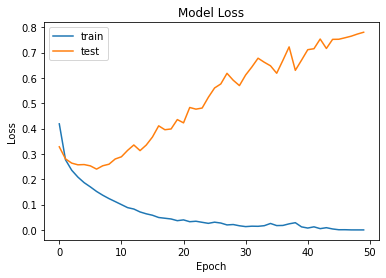

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

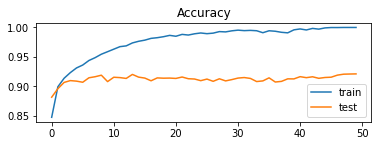

In [0]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform', input_shape=(28, 28, 1)))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, kernel_initializer='he_uniform'))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#	compile model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,verbose=2)

Epoch 1/50
1875/1875 - 55s - loss: 0.3947 - accuracy: 0.8576 - val_loss: 0.3187 - val_accuracy: 0.8878
Epoch 2/50
1875/1875 - 55s - loss: 0.2657 - accuracy: 0.9030 - val_loss: 0.2759 - val_accuracy: 0.8978
Epoch 3/50
1875/1875 - 55s - loss: 0.2206 - accuracy: 0.9183 - val_loss: 0.2436 - val_accuracy: 0.9121
Epoch 4/50
1875/1875 - 55s - loss: 0.1887 - accuracy: 0.9298 - val_loss: 0.2476 - val_accuracy: 0.9098
Epoch 5/50
1875/1875 - 55s - loss: 0.1641 - accuracy: 0.9386 - val_loss: 0.2414 - val_accuracy: 0.9152
Epoch 6/50
1875/1875 - 55s - loss: 0.1422 - accuracy: 0.9480 - val_loss: 0.2459 - val_accuracy: 0.9143
Epoch 7/50
1875/1875 - 55s - loss: 0.1209 - accuracy: 0.9543 - val_loss: 0.2581 - val_accuracy: 0.9148
Epoch 8/50
1875/1875 - 56s - loss: 0.1048 - accuracy: 0.9614 - val_loss: 0.2991 - val_accuracy: 0.9103
Epoch 9/50
1875/1875 - 55s - loss: 0.0938 - accuracy: 0.9645 - val_loss: 0.2739 - val_accuracy: 0.9169
Epoch 10/50
1875/1875 - 55s - loss: 0.0791 - accuracy: 0.9703 - val_loss:

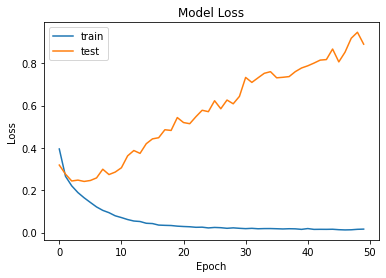

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

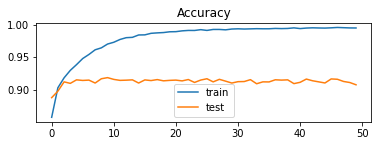

In [0]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [0]:
train_images=train_images / 255.0    ## to reduce the image pixel value from 0 to 255 to 0 to 1
test_images=test_images / 255.0

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform', input_shape=(28, 28, 1)))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, kernel_initializer='he_uniform'))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#	compile model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,verbose=2)

Epoch 1/50
1875/1875 - 55s - loss: 0.7836 - accuracy: 0.7041 - val_loss: 0.5498 - val_accuracy: 0.7933
Epoch 2/50
1875/1875 - 55s - loss: 0.5276 - accuracy: 0.8038 - val_loss: 0.4532 - val_accuracy: 0.8352
Epoch 3/50
1875/1875 - 55s - loss: 0.4578 - accuracy: 0.8348 - val_loss: 0.4076 - val_accuracy: 0.8517
Epoch 4/50
1875/1875 - 56s - loss: 0.4159 - accuracy: 0.8498 - val_loss: 0.3756 - val_accuracy: 0.8648
Epoch 5/50
1875/1875 - 54s - loss: 0.3871 - accuracy: 0.8596 - val_loss: 0.3564 - val_accuracy: 0.8695
Epoch 6/50
1875/1875 - 54s - loss: 0.3629 - accuracy: 0.8665 - val_loss: 0.3412 - val_accuracy: 0.8795
Epoch 7/50
1875/1875 - 55s - loss: 0.3493 - accuracy: 0.8733 - val_loss: 0.3265 - val_accuracy: 0.8813
Epoch 8/50
1875/1875 - 55s - loss: 0.3385 - accuracy: 0.8768 - val_loss: 0.3265 - val_accuracy: 0.8805
Epoch 9/50
1875/1875 - 55s - loss: 0.3211 - accuracy: 0.8812 - val_loss: 0.3187 - val_accuracy: 0.8834
Epoch 10/50
1875/1875 - 54s - loss: 0.3138 - accuracy: 0.8844 - val_loss:

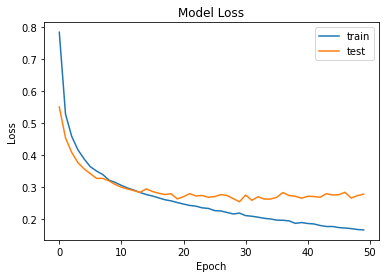

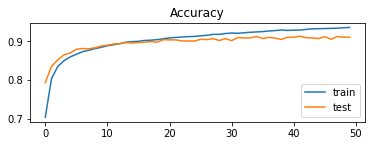

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform', input_shape=(28, 28, 1)))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, kernel_initializer='he_uniform'))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#	compile model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,verbose=2)

Epoch 1/50
1875/1875 - 57s - loss: 0.7439 - accuracy: 0.7201 - val_loss: 0.5203 - val_accuracy: 0.8101
Epoch 2/50
1875/1875 - 57s - loss: 0.5066 - accuracy: 0.8121 - val_loss: 0.4320 - val_accuracy: 0.8428
Epoch 3/50
1875/1875 - 57s - loss: 0.4441 - accuracy: 0.8375 - val_loss: 0.3944 - val_accuracy: 0.8555
Epoch 4/50
1875/1875 - 57s - loss: 0.4081 - accuracy: 0.8511 - val_loss: 0.3671 - val_accuracy: 0.8652
Epoch 5/50
1875/1875 - 61s - loss: 0.3853 - accuracy: 0.8599 - val_loss: 0.3412 - val_accuracy: 0.8773
Epoch 6/50
1875/1875 - 57s - loss: 0.3679 - accuracy: 0.8660 - val_loss: 0.3321 - val_accuracy: 0.8760
Epoch 7/50
1875/1875 - 57s - loss: 0.3558 - accuracy: 0.8698 - val_loss: 0.3331 - val_accuracy: 0.8771
Epoch 8/50
1875/1875 - 57s - loss: 0.3429 - accuracy: 0.8730 - val_loss: 0.3089 - val_accuracy: 0.8850
Epoch 9/50
1875/1875 - 57s - loss: 0.3320 - accuracy: 0.8772 - val_loss: 0.3070 - val_accuracy: 0.8879
Epoch 10/50
1875/1875 - 57s - loss: 0.3230 - accuracy: 0.8798 - val_loss:

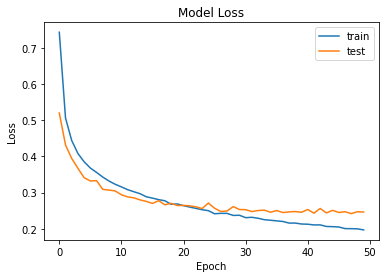

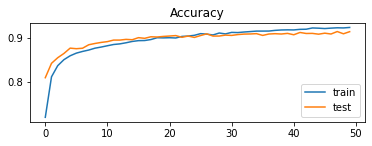

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show() 

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform', input_shape=(28, 28, 1)))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, kernel_initializer='he_uniform'))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.45))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#	compile model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,verbose=2)

Epoch 1/50
1875/1875 - 59s - loss: 0.8540 - accuracy: 0.6783 - val_loss: 0.5981 - val_accuracy: 0.7667
Epoch 2/50
1875/1875 - 57s - loss: 0.6091 - accuracy: 0.7700 - val_loss: 0.5012 - val_accuracy: 0.8094
Epoch 3/50
1875/1875 - 57s - loss: 0.5372 - accuracy: 0.8017 - val_loss: 0.4512 - val_accuracy: 0.8335
Epoch 4/50
1875/1875 - 57s - loss: 0.4937 - accuracy: 0.8197 - val_loss: 0.4223 - val_accuracy: 0.8472
Epoch 5/50
1875/1875 - 57s - loss: 0.4647 - accuracy: 0.8299 - val_loss: 0.3928 - val_accuracy: 0.8544
Epoch 6/50
1875/1875 - 57s - loss: 0.4426 - accuracy: 0.8390 - val_loss: 0.3790 - val_accuracy: 0.8619
Epoch 7/50
1875/1875 - 57s - loss: 0.4211 - accuracy: 0.8459 - val_loss: 0.3641 - val_accuracy: 0.8648
Epoch 8/50
1875/1875 - 60s - loss: 0.4091 - accuracy: 0.8521 - val_loss: 0.3478 - val_accuracy: 0.8709
Epoch 9/50
1875/1875 - 57s - loss: 0.3976 - accuracy: 0.8548 - val_loss: 0.3474 - val_accuracy: 0.8711
Epoch 10/50
1875/1875 - 57s - loss: 0.3858 - accuracy: 0.8588 - val_loss:

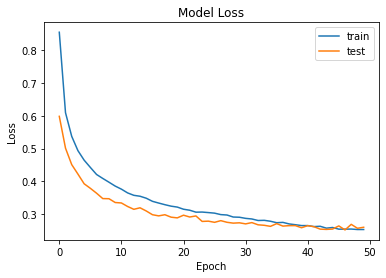

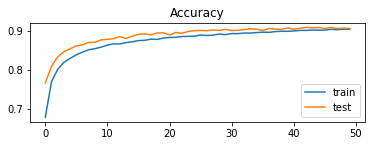

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show() 

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.45))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#	compile model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,verbose=2)

Epoch 1/50
1875/1875 - 58s - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/50
1875/1875 - 55s - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/50
1875/1875 - 55s - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
1875/1875 - 55s - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/50
1875/1875 - 55s - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
1875/1875 - 55s - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
1875/1875 - 55s - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/50
1875/1875 - 55s - loss: 2.3028 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 9/50
1875/1875 - 55s - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 10/50
1875/1875 - 55s - loss: 2.3028 - accuracy: 0.0971 - val_loss:

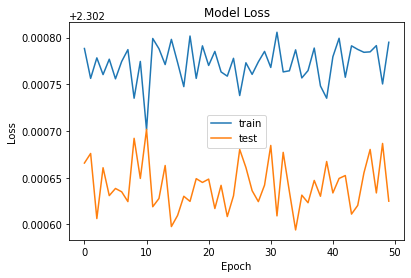

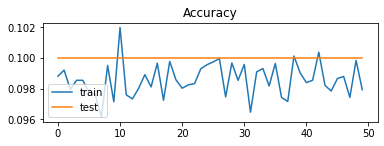

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show() 

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu))##
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.35))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#	compile model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,verbose=2)

Epoch 1/50
1875/1875 - 56s - loss: 1.0263 - accuracy: 0.6185 - val_loss: 0.6756 - val_accuracy: 0.7417
Epoch 2/50
1875/1875 - 56s - loss: 0.7349 - accuracy: 0.7227 - val_loss: 0.6021 - val_accuracy: 0.7688
Epoch 3/50
1875/1875 - 56s - loss: 0.6590 - accuracy: 0.7494 - val_loss: 0.5348 - val_accuracy: 0.8006
Epoch 4/50
1875/1875 - 56s - loss: 0.6039 - accuracy: 0.7725 - val_loss: 0.4980 - val_accuracy: 0.8169
Epoch 5/50
1875/1875 - 56s - loss: 0.5653 - accuracy: 0.7893 - val_loss: 0.4805 - val_accuracy: 0.8223
Epoch 6/50
1875/1875 - 59s - loss: 0.5378 - accuracy: 0.8006 - val_loss: 0.4509 - val_accuracy: 0.8405
Epoch 7/50
1875/1875 - 56s - loss: 0.5248 - accuracy: 0.8064 - val_loss: 0.4394 - val_accuracy: 0.8366
Epoch 8/50
1875/1875 - 56s - loss: 0.5043 - accuracy: 0.8150 - val_loss: 0.4252 - val_accuracy: 0.8459
Epoch 9/50
1875/1875 - 56s - loss: 0.4928 - accuracy: 0.8190 - val_loss: 0.4155 - val_accuracy: 0.8546
Epoch 10/50
1875/1875 - 56s - loss: 0.4794 - accuracy: 0.8236 - val_loss:

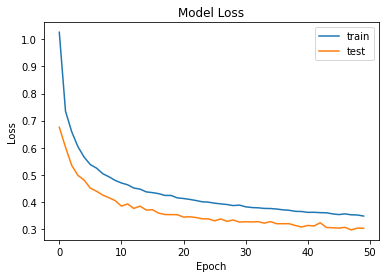

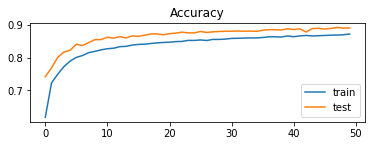

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show() 